# Retrosynthesis AI
### Bioinformatics Training
Created by: Margaret Liñán MS MPH
<img src="bioinf.png" />
In this tutorial, you will learn how to utilize Networkx and KEGG to build weighted and directed interactive heterogenous graph networks (HetNets) that can be used to Repurpose Drugs using a complementary pathway approach, and other network functions.

## Section 1 - Find Drugs for a Disease
ChEMBL is a manually curated database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs. In the following exercises you will be trained to use ChEMBL's Web Client for extracting ChEMBL IDs, Synonyms, Indication Class, and whether it is ProDrug, Parenteral and Oral. You will also learn how to reformat JSON string output and generate molecular images.

##### Notes
The following exercises were adapted from the ChEMBL web resource client examples on Binder

##### Resources
<a href="https://chembl.gitbook.io/chembl-interface-documentation/web-services/chembl-data-web-services">Bio Kegg Rest API</a> <br>
<a href="https://bioservices.readthedocs.io/en/master/notebooks.html">Bioservices</a>


### Use Retrosynthesis AI to find KEGG pathways and the drugs that share them

In [ ]:
%matplotlib inline

In [ ]:
# Show images inline
from IPython.display import Image

# Standard library packages
import io
import os

# Import Biopython modules to interact with KEGG
from Bio import SeqIO
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
#from Bio.Graphics.KGML_vis import KGMLCanvas

# Import Pandas, so we can use dataframes
import pandas as pd

In [ ]:
from Bio.KEGG import REST
## http://biopython.org/DIST/docs/tutorial/Tutorial.pdf 
human_pathways = REST.kegg_list("pathway", "hsa").read()

# Filter all human pathways for repair pathways
repair_pathways = []
for line in human_pathways.rstrip().split("\n"):
    entry, description = line.split("\t")
    if "repair" in description:
        repair_pathways.append(entry)

# Print resulting KEGG Pathways
print("These pathway IDs match the map IDs in the next cell")
print(repair_pathways)

These pathway IDs match the map IDs in the next cell
['path:hsa03410', 'path:hsa03420', 'path:hsa03430']


In [ ]:
# Filter all human pathways for repair pathways
k.lookfor_pathway("repair")


['path:map03410 Base excision repair',
 'path:map03420 Nucleotide excision repair',
 'path:map03430 Mismatch repair']

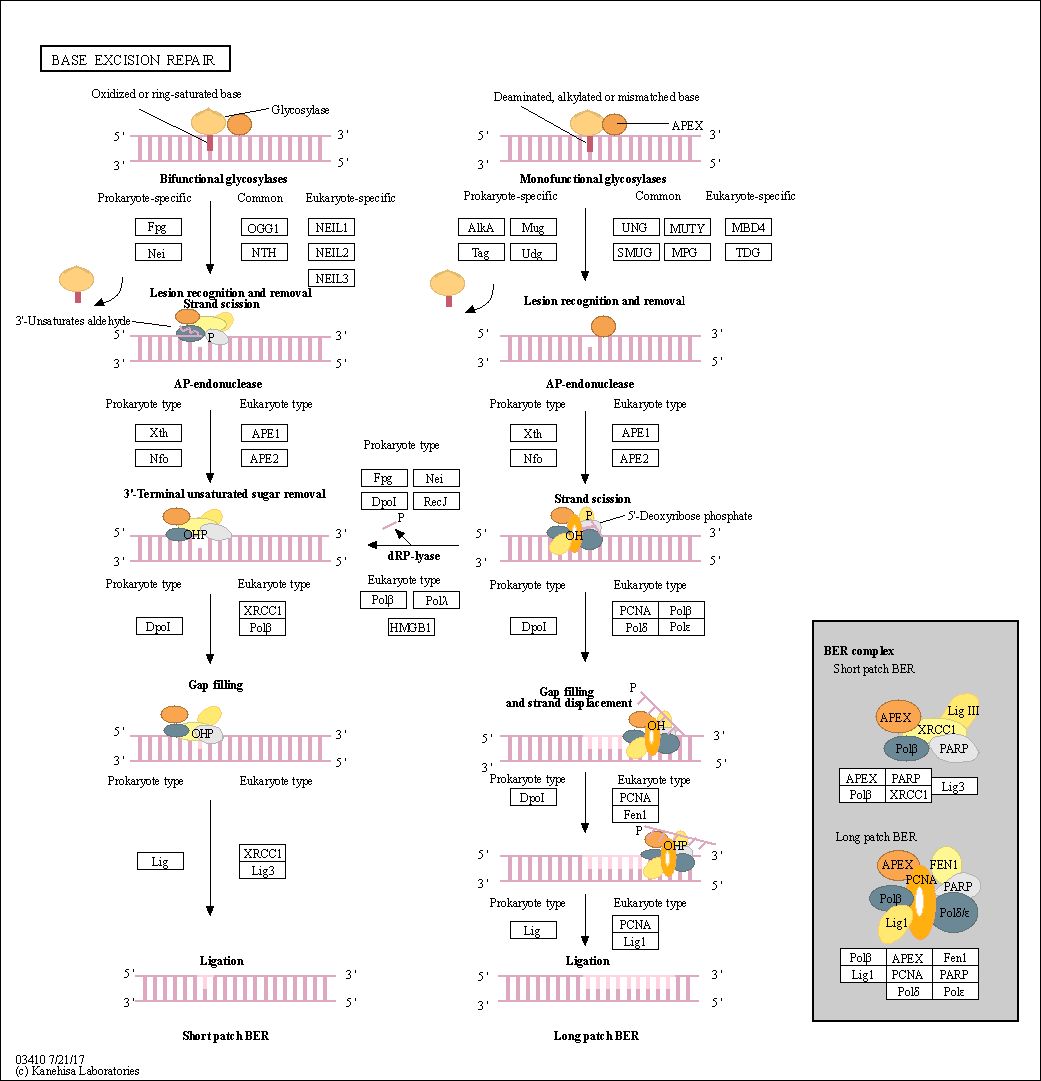

In [ ]:
# Get map of Base excision repair
result = REST.kegg_get("map03410", "image").read()
Image(result)

In [ ]:
## Use string to find pathways and Kegg Map

k.lookfor_pathway("B cell")

['path:map04662 B cell receptor signaling pathway']

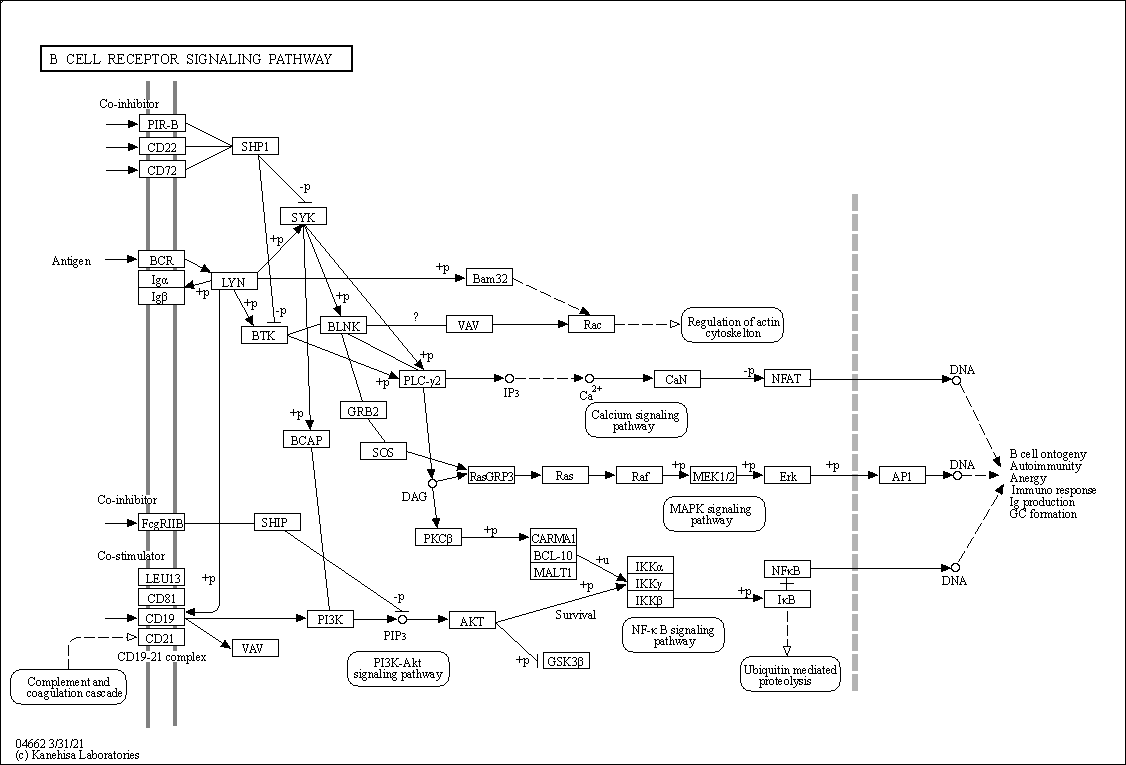

In [ ]:
# Get map of B Cell Receptor Signaling Pathway
result = REST.kegg_get("map04662", "image").read()
Image(result)

#### Discover Drugs for Queried Diseases
    from chembl_webresource_client.new_client import new_client

    drug_indication = new_client.drug_indication
    molecules = new_client.molecule
    
    ## Replace the query string: LUNG CARCINOMA with another string
    lung_cancer_ind = drug_indication.filter(efo_term__icontains="LUNG CARCINOMA")
    lung_cancer_mols = molecules.filter(
    molecule_chembl_id__in=[x['molecule_chembl_id'] for x in lung_cancer_ind])

    print("The total number of drugs for Lung Cancer: ", len(lung_cancer_mols))
    print("")
    
    ## Remove [0:5] to output all results
    subset = lung_cancer_mols[0:5] 
    print("Here is the subset")
    print("-----------------------------------------------------------------------")
    for i in subset:
        print(i)

The total number of drugs for Lung Cancer:  631

Here is the subset
-----------------------------------------------------------------------
{'atc_classifications': ['L04AA10', 'S01XA23'], 'availability_type': 1, 'biotherapeutic': None, 'black_box_warning': 1, 'chebi_par_id': 9168, 'chirality': 1, 'cross_references': [{'xref_id': 'sirolimus', 'xref_name': 'sirolimus', 'xref_src': 'DailyMed'}, {'xref_id': '124886754', 'xref_name': 'SID: 124886754', 'xref_src': 'PubChem'}, {'xref_id': '144204421', 'xref_name': 'SID: 144204421', 'xref_src': 'PubChem'}, {'xref_id': '144206303', 'xref_name': 'SID: 144206303', 'xref_src': 'PubChem'}, {'xref_id': '50103901', 'xref_name': 'SID: 50103901', 'xref_src': 'PubChem'}, {'xref_id': 'Sirolimus', 'xref_name': None, 'xref_src': 'Wikipedia'}], 'dosed_ingredient': True, 'first_approval': 1999, 'first_in_class': 0, 'helm_notation': None, 'indication_class': 'Immunosuppressant', 'inorganic_flag': 0, 'max_phase': 4, 'molecule_chembl_id': 'CHEMBL413', 'molecule

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=367703e1-92f2-45b8-a3b3-39f4563b698f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>